# Imports

In [1]:
import numpy as np
import pandas as pd

import glob
import os

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import scipy.stats as stats  #for Q-Q plot

import matplotlib.pyplot as plt
import seaborn as sns

import gc

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1.Loading Data
Time Range: 2016-01-01---2020-10-29


## 1.1 Daily Max/Min temperature data
max_temp:  [BOM:Daily Maximum Temperature of Station:Melbourne(Olympic Park)](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=122&p_display_type=dailyDataFile&p_startYear=&p_c=&p_stn_num=086338)\
min_temp:   [BOM:Daily Minimum Temperature of Station:Melbourne(Olympic Park)](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=123&p_display_type=dailyDataFile&p_startYear=&p_c=&p_stn_num=086338)\
temperature: max_temp left join on min_temp

In [2]:
max_temp=pd.read_csv('IDCJAC0010_086338_1800_Data.csv')

In [3]:
min_temp=pd.read_csv('IDCJAC0011_086338_1800_Data.csv')

In [4]:
max_temp.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,86338,2013,1,1,NaN,NaN,NaN
1,IDCJAC0010,86338,2013,1,2,NaN,NaN,NaN
2,IDCJAC0010,86338,2013,1,3,NaN,NaN,NaN
3,IDCJAC0010,86338,2013,1,4,NaN,NaN,NaN
4,IDCJAC0010,86338,2013,1,5,NaN,NaN,NaN


In [5]:
max_temp[max_temp['Days of accumulation of maximum temperature'].isnull() == False].head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
151,IDCJAC0010,86338,2013,6,1,15.8,1.0,Y
152,IDCJAC0010,86338,2013,6,2,15.7,1.0,Y
153,IDCJAC0010,86338,2013,6,3,14.8,1.0,Y
154,IDCJAC0010,86338,2013,6,4,15.0,1.0,Y
155,IDCJAC0010,86338,2013,6,5,14.6,1.0,Y


In [6]:
max_temp.columns

Index(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month',
       'Day', 'Maximum temperature (Degree C)',
       'Days of accumulation of maximum temperature', 'Quality'],
      dtype='object')

In [7]:
max_temp=max_temp.drop(columns=['Product code', 'Bureau of Meteorology station number',
                                'Days of accumulation of maximum temperature', 'Quality'])

In [8]:
max_temp.head()

,Year,Month,Day,Maximum temperature (Degree C)
0,2013,1,1,NaN
1,2013,1,2,NaN
2,2013,1,3,NaN
3,2013,1,4,NaN
4,2013,1,5,NaN


In [9]:
max_temp=max_temp.rename(columns={'Maximum temperature (Degree C)':'max_temp'})

In [10]:
max_temp=max_temp[max_temp['Year']>=2016]

In [11]:
max_temp.isnull().sum() # No null values

Year        0
Month       0
Day         0
max_temp    0
dtype: int64

In [12]:
max_temp.index=pd.to_datetime(max_temp[['Year','Month','Day']])

In [13]:
max_temp=max_temp.drop(columns=['Year','Month','Day'])

In [14]:
max_temp.tail()

,max_temp
2020-10-25,14.6
2020-10-26,17.9
2020-10-27,19.6
2020-10-28,20.9
2020-10-29,24.3


In [15]:
max_temp.shape

(1764, 1)

In [16]:
min_temp.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,86338,2013,1,1,NaN,NaN,NaN
1,IDCJAC0011,86338,2013,1,2,NaN,NaN,NaN
2,IDCJAC0011,86338,2013,1,3,NaN,NaN,NaN
3,IDCJAC0011,86338,2013,1,4,NaN,NaN,NaN
4,IDCJAC0011,86338,2013,1,5,NaN,NaN,NaN


In [17]:
min_temp=min_temp.drop(columns=['Product code', 'Bureau of Meteorology station number',
                                'Days of accumulation of minimum temperature','Quality'])
min_temp=min_temp.rename(columns={'Minimum temperature (Degree C)':'min_temp'})
min_temp=min_temp[min_temp['Year']>=2016]
min_temp.index=pd.to_datetime(min_temp[['Year','Month','Day']])
min_temp=min_temp.drop(columns=['Year','Month','Day'])

In [18]:
min_temp.shape

(1765, 1)

In [19]:
min_temp.tail()

,min_temp
2020-10-26,9.2
2020-10-27,11.1
2020-10-28,9.5
2020-10-29,11.2
2020-10-30,12.9


In [20]:
min_temp.isnull().sum()

min_temp    0
dtype: int64

In [21]:
temperature=max_temp.join(min_temp,how='left')

In [22]:
temperature.tail()

,max_temp,min_temp
2020-10-25,14.6,8.3
2020-10-26,17.9,9.2
2020-10-27,19.6,11.1
2020-10-28,20.9,9.5
2020-10-29,24.3,11.2


In [23]:
temperature.dtypes

max_temp    float64
min_temp    float64
dtype: object

## 1.2 Victoria Total Demand
demand:  [AEMO: VIC-30-Min Aggregated Price & Demand Data)](https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data)

In [24]:
path = r'C:\Users\syxsw\MLProjects\Australia_Electricity\AEMO VIC-30-Min Aggregated Price and Demand' 
all_files = glob.glob(path + "/*.csv")

lst = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lst.append(df)

demand = pd.concat(lst, axis=0, ignore_index=True,sort=True)

In [25]:
demand.shape

(84672, 5)

In [26]:
demand.to_csv(r'C:\Users\syxsw\MLProjects\Australia_Electricity\2016-2020.10-demand.csv')

In [27]:
demand.tail()

,PERIODTYPE,REGION,RRP,SETTLEMENTDATE,TOTALDEMAND
84667,TRADE,VIC1,47.98,2020/10/29 22:00:00,4446.18
84668,TRADE,VIC1,54.33,2020/10/29 22:30:00,4353.45
84669,TRADE,VIC1,51.07,2020/10/29 23:00:00,4293.65
84670,TRADE,VIC1,56.93,2020/10/29 23:30:00,4479.59
84671,TRADE,VIC1,54.41,2020/10/30 00:00:00,4454.78


In [28]:
demand=demand.drop(columns=['PERIODTYPE', 'REGION','RRP'])
demand=demand.rename(columns={'TOTALDEMAND': 'demand','SETTLEMENTDATE': 'date'})
demand.index=pd.to_datetime(demand['date'])
demand=demand.drop(columns=['date'])


## 1.3 Victoria Day Length
demand:  [Sunrise and Sunset in Melbourne](https://www.timeanddate.com/sun/australia/melbourne)

In [29]:
day_length=pd.read_csv('2016-2020.10-daylength-new.csv')

In [30]:
day_length.head()

,date,daylight
0,2016/01/01,14:44:19
1,2016/01/02,14:43:40
2,2016/01/03,14:42:58
3,2016/01/04,14:42:12
4,2016/01/05,14:41:23


In [31]:
day_length.tail()

,date,daylight
1760,2020/10/26,13:28:18
1761,2020/10/27,13:30:35
1762,2020/10/28,13:32:50
1763,2020/10/29,13:35:05
1764,2020/10/30,13:37:18


In [32]:
#Caculate day length in minutes
def time_to_minutes(time):
    t1=int(time.split(':')[0])
    t2=int(time.split(':')[1])
    t3=int(time.split(':')[2])
    minutes=round(t1*60+t2+t3/60,2)
    return minutes

In [33]:
# time_to_minutes(day_length['daylight'][0])

In [34]:
day_length['day_length_mins']=day_length['daylight'].apply(lambda x: time_to_minutes(x))

In [35]:
day_length.tail(30)

,date,daylight,day_length_mins
1735,2020/10/01,12:28:53,748.88
1736,2020/10/02,12:31:18,751.30
1737,2020/10/03,12:33:43,753.72
1738,2020/10/04,12:36:09,756.15
1739,2020/10/05,12:38:34,758.57
1740,2020/10/06,12:40:59,760.98
1741,2020/10/07,12:43:24,763.40
1742,2020/10/08,12:45:49,765.82
1743,2020/10/09,12:48:13,768.22
1744,2020/10/10,12:50:38,770.63


In [36]:
day_length.index=pd.to_datetime(day_length['date'])
day_length=day_length.drop(columns=['date'])

In [37]:
day_length.tail(30)

,daylight,day_length_mins
date,,
2020-10-01,12:28:53,748.88
2020-10-02,12:31:18,751.30
2020-10-03,12:33:43,753.72
2020-10-04,12:36:09,756.15
2020-10-05,12:38:34,758.57
2020-10-06,12:40:59,760.98
2020-10-07,12:43:24,763.40
2020-10-08,12:45:49,765.82
2020-10-09,12:48:13,768.22


In [38]:
day_length[day_length.index=='2020-10-12']

,daylight,day_length_mins
date,,
2020-10-12,12:55:26,775.43


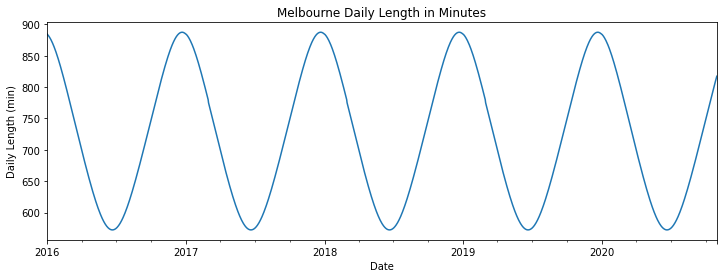

In [39]:
title='Melbourne Daily Length in Minutes'
ylabel='Daily Length (min)'
xlabel='Date'

ax = day_length['day_length_mins'].plot(figsize=(12,4),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## 1.4 Victoria Public Holidays
holiday:  [2016-2020-Australia Public Holidays](https://data.gov.au/dataset/ds-dga-b1bc6077-dadd-4f61-9f8c-002ab2cdff10/details)

In [40]:
# 2016-2018 have different format with 2019-2020
# path = r'C:\Users\syxsw\MLProjects\Australia_Electricity\2016-2020 AU Public Holiday' 
# all_files = glob.glob(path + "/*.csv")

# lst = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     lst.append(df)

# holiday = pd.concat(lst, axis=0, ignore_index=True)

In [41]:
h1=pd.read_csv(r'C:/Users/syxsw/MLProjects/Australia_Electricity/2016-2020 AU Public Holiday/australianpublicholidays-201617.csv')
h2=pd.read_csv(r'C:/Users/syxsw/MLProjects/Australia_Electricity/2016-2020 AU Public Holiday/australianpublicholidays-201718.csv')

In [42]:
h1.head()

,Date,Holiday Name,Information,More Information,Applicable To
0,20160101,New Year's Day,New Year's Day is the first day of the calenda...,NaN,NAT
1,20160126,Australia Day,Always celebrated on 26 January,NaN,NAT
2,20160307,Labour Day,"Always on a Monday, creating a long weekend. I...",http://www.commerce.wa.gov.au/labour-relations...,WA
3,20160314,March public holiday,The Holidays Act 1910 provides for the third M...,http://www.safework.sa.gov.au/show_page.jsp?id...,SA
4,20160314,Canberra Day,Held on the second Monday of March each year i...,http://www.cmd.act.gov.au/communication/holidays,ACT


In [43]:
h2.head()

,Date,Holiday Name,Information,More Information,Applicable To
0,20170101,New Year's Day,New Year's Day is the first day of the calenda...,NaN,NAT
1,20170102,Additional day,NaN,NaN,NAT
2,20170126,Australia Day,Always celebrated on 26 January,NaN,NAT
3,20170212,Royal Hobart Regatta,NaN,NaN,TAS
4,20170306,Labour Day,"Always on a Monday, creating a long weekend. I...",http://www.commerce.wa.gov.au/labour-relations...,WA


In [44]:
h1['Applicable To'].value_counts()

NAT                          13
SA                            9
WA                            7
VIC                           6
NT                            4
TAS                           4
ACT                           4
QLD                           4
ACT|NSW|SA                    2
ACT|NSW|NT|SA|TAS|VIC         2
ACT|NSW|NT|QLD|WA|TAS|VIC     2
ACT|NSW|VIC                   2
ACT|NSW|SA|VIC|QLD|NT         1
ACT|NSW|SA|QLD|NT|VIC         1
ACT|TAS|VIC|NSW|QLD|NT|WA     1
Name: Applicable To, dtype: int64

In [45]:
h1['Applicable To'].value_counts().index

Index(['NAT', 'SA', 'WA', 'VIC', 'NT', 'TAS', 'ACT', 'QLD', 'ACT|NSW|SA',
       'ACT|NSW|NT|SA|TAS|VIC', 'ACT|NSW|NT|QLD|WA|TAS|VIC', 'ACT|NSW|VIC',
       'ACT|NSW|SA|VIC|QLD|NT', 'ACT|NSW|SA|QLD|NT|VIC',
       'ACT|TAS|VIC|NSW|QLD|NT|WA'],
      dtype='object')

In [46]:
vic_list=['VIC','ACT|NSW|NT|QLD|WA|TAS|VIC', 'ACT|NSW|VIC', 'ACT|NSW|NT|SA|TAS|VIC',
             'ACT|TAS|VIC|NSW|QLD|NT|WA', 'ACT|NSW|SA|QLD|NT|VIC','ACT|NSW|SA|VIC|QLD|NT']

In [47]:
h1['isholiday']=0

In [48]:
h1=h1[h1['Applicable To'].isin(vic_list)]

In [49]:
h1['isholiday'] = 1

In [50]:
h2['Applicable To'].value_counts()

NAT                          13
VIC                           6
TAS                           6
WA                            6
NT                            4
ACT                           4
QLD                           4
NT|SA                         4
SA                            4
ACT|NSW|SA                    2
ACT|NSW|NT|SA|TAS|VIC         2
ACT|NSW|NT|QLD|SA|VIC         2
ACT|NSW|NT|QLD|TAS|VIC|WA     2
NSW                           2
ACT|NSW|QLD|VIC               2
Name: Applicable To, dtype: int64

In [51]:
h2['isholiday']=0
h2=h2[h2['Applicable To'].isin(vic_list)]
h2['isholiday'] = 1

In [52]:
h2

,Date,Holiday Name,Information,More Information,Applicable To,isholiday
8,20170313,Labour Day,"Always on a Monday, creating a long weekend. I...",http://www.business.vic.gov.au/victorian-publi...,VIC,1
17,20170612,Queen's Birthday,Celebrated on second Monday in June except in ...,https://www.gg.gov.au/queens-birthday-2014-hon...,ACT|NSW|NT|SA|TAS|VIC,1
22,20170929,AFL Grand Final,Friday before the AFL Grand Final,NaN,VIC,1
26,20171107,Melbourne Cup,All of Victoria unless alternate local holiday...,http://www.business.vic.gov.au/victorian-publi...,VIC,1
39,20180312,Labour Day,"Always on a Monday, creating a long weekend. I...",http://www.business.vic.gov.au/victorian-publi...,VIC,1
49,20180611,Queen's Birthday,Celebrated on second Monday in June except in ...,https://www.gg.gov.au/queens-birthday-2014-hon...,ACT|NSW|NT|SA|TAS|VIC,1
53,20180928,Friday before the AFL Grand Final,Friday before the AFL Grand Final,NaN,VIC,1
57,20181106,Melbourne Cup,All of Victoria unless alternate local holiday...,http://www.business.vic.gov.au/victorian-publi...,VIC,1


In [53]:
h12=pd.concat([h1,h2],ignore_index=True)

In [54]:
h12=h12.drop(columns=['Holiday Name','Information','More Information','Applicable To'])

In [55]:
h12

,Date,isholiday
0,20160314,1
1,20160326,1
2,20160327,1
3,20160613,1
4,20160930,1
5,20161101,1
6,20161226,1
7,20161227,1
8,20170313,1
9,20170415,1


In [56]:
h3=pd.read_csv(r'C:/Users/syxsw/MLProjects/Australia_Electricity/2016-2020 AU Public Holiday/australian_public_holidays_2019.csv')
h4=pd.read_csv(r'C:/Users/syxsw/MLProjects/Australia_Electricity/2016-2020 AU Public Holiday/australian_public_holidays_2020.csv')
h34 = pd.concat([h3, h4], ignore_index=True)
h34 = h34[h34['Jurisdiction']=='vic']
h34.head()

,Date,Holiday Name,Information,Jurisdiction,More Information,Raw Date
73,20190101,New Year's Day,New Year's Day is the first day of the calenda...,vic,http://www.business.vic.gov.au/victorian-publi...,1.546261e+09
74,20190128,Australia Day,Always celebrated on 26 January,vic,http://www.business.vic.gov.au/victorian-publi...,1.548594e+09
75,20190311,Labour Day,"Always on a Monday, creating a long weekend. I...",vic,http://www.business.vic.gov.au/victorian-publi...,1.552223e+09
76,20190419,Good Friday,Easter is celebrated with Good Friday and East...,vic,http://www.business.vic.gov.au/victorian-publi...,1.555596e+09
77,20190420,Saturday before Easter Sunday,Easter Saturday is between Good Friday and Eas...,vic,http://www.business.vic.gov.au/victorian-publi...,1.555682e+09


In [57]:
h34.head()

,Date,Holiday Name,Information,Jurisdiction,More Information,Raw Date
73,20190101,New Year's Day,New Year's Day is the first day of the calenda...,vic,http://www.business.vic.gov.au/victorian-publi...,1.546261e+09
74,20190128,Australia Day,Always celebrated on 26 January,vic,http://www.business.vic.gov.au/victorian-publi...,1.548594e+09
75,20190311,Labour Day,"Always on a Monday, creating a long weekend. I...",vic,http://www.business.vic.gov.au/victorian-publi...,1.552223e+09
76,20190419,Good Friday,Easter is celebrated with Good Friday and East...,vic,http://www.business.vic.gov.au/victorian-publi...,1.555596e+09
77,20190420,Saturday before Easter Sunday,Easter Saturday is between Good Friday and Eas...,vic,http://www.business.vic.gov.au/victorian-publi...,1.555682e+09


In [58]:
h34['isholiday']=1
h34=h34.drop(columns=['Holiday Name','Information','Jurisdiction','More Information','Raw Date'])
h34.head()

,Date,isholiday
73,20190101,1
74,20190128,1
75,20190311,1
76,20190419,1
77,20190420,1


In [59]:
holiday=pd.concat([h12,h34],ignore_index=True)

In [60]:
holiday.to_csv(r'C:\Users\syxsw\MLProjects\Australia_Electricity\2016-2020-AU-Holiday.csv')

In [61]:
holiday.index=pd.to_datetime(holiday['Date'],format='%Y%m%d')
holiday=holiday.drop(columns=['Date'])

In [62]:
holiday.head()

,isholiday
Date,
2016-03-14,1
2016-03-26,1
2016-03-27,1
2016-06-13,1
2016-09-30,1


In [63]:
holiday.shape

(50, 1)

## 1.5 Merge temperature,demand,day_length and holiday

In [64]:
demand.head()

,demand
date,
2016-01-01 00:30:00,5197.34
2016-01-01 01:00:00,4934.54
2016-01-01 01:30:00,4721.32
2016-01-01 02:00:00,4541.24
2016-01-01 02:30:00,4344.18


<span style='color:red'>demand timeseries format(30-min) is different with the other three. Needs to be changed to daily format</span>

In [65]:
demand=demand.reset_index()

In [66]:
demand.head()

,date,demand
0,2016-01-01 00:30:00,5197.34
1,2016-01-01 01:00:00,4934.54
2,2016-01-01 01:30:00,4721.32
3,2016-01-01 02:00:00,4541.24
4,2016-01-01 02:30:00,4344.18


In [67]:
demand['30min']=demand['date']

In [68]:
demand.index=demand['date'].dt.date

In [69]:
demand=demand.drop(columns='date')

In [70]:
demand.head()

,demand,30min
date,,
2016-01-01,5197.34,2016-01-01 00:30:00
2016-01-01,4934.54,2016-01-01 01:00:00
2016-01-01,4721.32,2016-01-01 01:30:00
2016-01-01,4541.24,2016-01-01 02:00:00
2016-01-01,4344.18,2016-01-01 02:30:00


In [71]:
temperature.head()

,max_temp,min_temp
2016-01-01,24.2,19.8
2016-01-02,27.6,17.1
2016-01-03,27.1,17.5
2016-01-04,26.0,16.3
2016-01-05,25.7,17.1


<sapn style='color:red'>Until here, the 2020-10-11,12 data are correct</span>

In [78]:
df1=pd.merge(demand, temperature, how='left', left_index=True, right_index=True)

In [79]:
df1.head()

,demand,30min,max_temp,min_temp
2016-01-01,5197.34,2016-01-01 00:30:00,24.2,19.8
2016-01-01,4934.54,2016-01-01 01:00:00,24.2,19.8
2016-01-01,4721.32,2016-01-01 01:30:00,24.2,19.8
2016-01-01,4541.24,2016-01-01 02:00:00,24.2,19.8
2016-01-01,4344.18,2016-01-01 02:30:00,24.2,19.8


In [80]:
df1=pd.merge(df1, day_length, how='left', left_index=True, right_index=True)

In [81]:
df1.tail()

,demand,30min,max_temp,min_temp,daylight,day_length_mins
2020-10-29,4446.18,2020-10-29 22:00:00,24.3,11.2,13:35:05,815.08
2020-10-29,4353.45,2020-10-29 22:30:00,24.3,11.2,13:35:05,815.08
2020-10-29,4293.65,2020-10-29 23:00:00,24.3,11.2,13:35:05,815.08
2020-10-29,4479.59,2020-10-29 23:30:00,24.3,11.2,13:35:05,815.08
2020-10-30,4454.78,2020-10-30 00:00:00,NaN,NaN,13:37:18,817.30


In [82]:
df1=pd.merge(df1,holiday,how='left',left_index=True,right_index=True)

In [83]:
df1['isholiday'].value_counts()

1.0    2208
Name: isholiday, dtype: int64

In [87]:
df1=df1.iloc[:-1]

In [88]:
df1.tail()

,demand,30min,max_temp,min_temp,daylight,day_length_mins,isholiday
2020-10-29,4621.36,2020-10-29 21:30:00,24.3,11.2,13:35:05,815.08,NaN
2020-10-29,4446.18,2020-10-29 22:00:00,24.3,11.2,13:35:05,815.08,NaN
2020-10-29,4353.45,2020-10-29 22:30:00,24.3,11.2,13:35:05,815.08,NaN
2020-10-29,4293.65,2020-10-29 23:00:00,24.3,11.2,13:35:05,815.08,NaN
2020-10-29,4479.59,2020-10-29 23:30:00,24.3,11.2,13:35:05,815.08,NaN


# 2. EDA for seasonality,outliers and correlation

## 2.2.1 Explore seasonality 
Clear seasonality but data needs to be further smoothed.

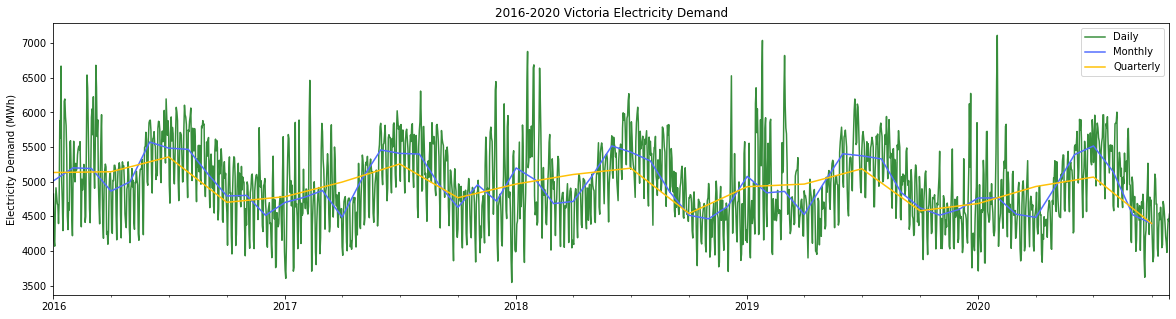

In [89]:

title ='2016-2020 Victoria Electricity Demand'
xlabel=''
ylabel='Electricity Demand (MWh)'

ax=df1['demand'].resample(rule='D').mean().plot(label='Daily',color='#388E3C',figsize=(20,5),title=title)
ax=df1['demand'].resample(rule='M').mean().plot(label='Monthly',color='#536DFE')
ax=df1['demand'].resample(rule='Q').mean().plot(label='Quarterly',color='#FFC107')
ax.autoscale(axis='x',tight=True)
ax.legend(loc='upper right')
ax.set(xlabel=xlabel,ylabel=ylabel);


## Function to plot daily/hourly demand profile by years

### Daily Demand Profile

In [90]:
demand.index=pd.to_datetime(demand.index)

In [91]:
def daily_demand_profile(df):
    year_demand=df[['demand']]
    year_demand['year']=year_demand.index.year
    year_demand['day_of_year']=year_demand.index.dayofyear
                                                          
    year_2016= year_demand[year_demand['year']==2016].groupby('day_of_year').mean()['demand']
    year_2017= year_demand[year_demand['year']==2017].groupby('day_of_year').mean()['demand']
    year_2018= year_demand[year_demand['year']==2018].groupby('day_of_year').mean()['demand']
    year_2019= year_demand[year_demand['year']==2019].groupby('day_of_year').mean()['demand']
    year_2020= year_demand[year_demand['year']==2020].groupby('day_of_year').mean()['demand']
    
    df2016=pd.DataFrame(data=year_2016.values,index=year_2016.index,columns=['2016'])
    df2017=pd.DataFrame(data=year_2017.values,index=year_2017.index,columns=['2017'])
    df2018=pd.DataFrame(data=year_2018.values,index=year_2018.index,columns=['2018'])
    df2019=pd.DataFrame(data=year_2019.values,index=year_2019.index,columns=['2019'])
    df2020=pd.DataFrame(data=year_2020.values,index=year_2020.index,columns=['2020'])
    
    df_all=pd.concat([df2016,df2017,df2018,df2019,df2020],axis=1)

    
    
    return df_all

In [92]:
demand_daily=daily_demand_profile(demand)

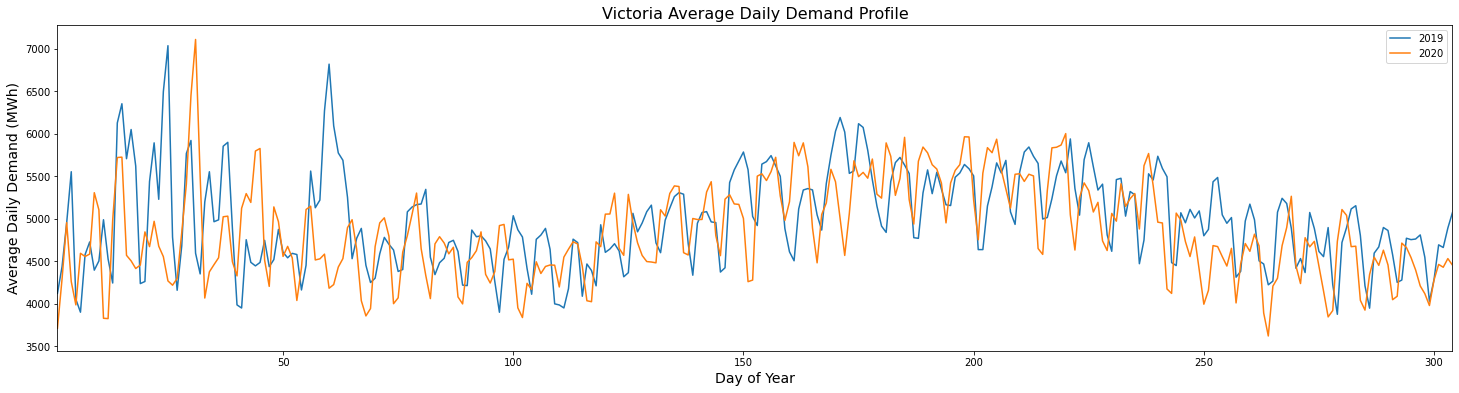

In [93]:
demand_daily.iloc[:304][['2019','2020']].plot(figsize=(25,6)) # Slice from January ---October
plt.legend(loc='upper right', labels=[ '2019', '2020'])
plt.xlabel('Day of Year',fontsize=14)
plt.ylabel('Average Daily Demand (MWh)',fontsize=14)
plt.title('Victoria Average Daily Demand Profile',fontsize=16);
    

### Hourly Demand Profile

In [94]:
def hourly_demand_profile(df):
    year_demand=df[['demand']]
    year_demand['year']=year_demand.index.year
    year_demand['hour_of_day']=df['30min'].dt.hour
                                                          
    year_2016= year_demand[year_demand['year']==2016].groupby('hour_of_day').mean()['demand']
    year_2017= year_demand[year_demand['year']==2017].groupby('hour_of_day').mean()['demand']
    year_2018= year_demand[year_demand['year']==2018].groupby('hour_of_day').mean()['demand']
    year_2019= year_demand[year_demand['year']==2019].groupby('hour_of_day').mean()['demand']
    year_2020= year_demand[year_demand['year']==2020].groupby('hour_of_day').mean()['demand']
    
    df2016=pd.DataFrame(data=year_2016.values,index=year_2016.index,columns=['2016'])
    df2017=pd.DataFrame(data=year_2017.values,index=year_2017.index,columns=['2017'])
    df2018=pd.DataFrame(data=year_2018.values,index=year_2018.index,columns=['2018'])
    df2019=pd.DataFrame(data=year_2019.values,index=year_2019.index,columns=['2019'])
    df2020=pd.DataFrame(data=year_2020.values,index=year_2020.index,columns=['2020'])
    
    df_all=pd.concat([df2016,df2017,df2018,df2019,df2020],axis=1)

    
    
    return df_all

In [95]:
demand_hourly=hourly_demand_profile(demand)

Hourly demand profile indicates that due to Covid-19,there is a late morning peak hour from 7 amm to 9 am. \
Followed with an apparent demand drop down during peak hours 9 am to 18 pm. \
At night, the peak demand is a little higher than previous years.

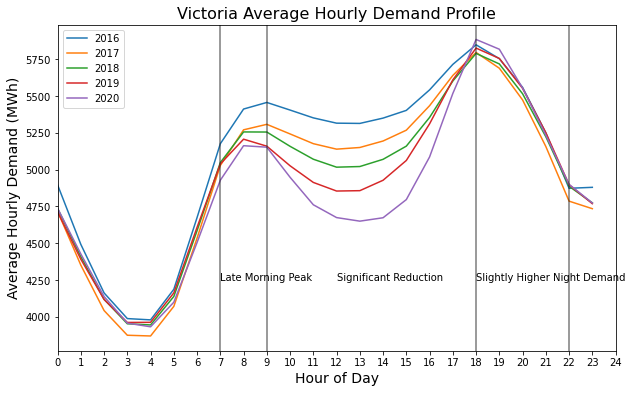

In [96]:
demand_hourly.plot(figsize=(10,6)) # Slice from January ---October
plt.legend(loc='upper left', labels=['2016','2017','2018','2019', '2020'])
plt.xlabel('Hour of Day',fontsize=14)
plt.xticks(np.arange(0, 25, 1))
plt.axvline(x=7,color='#212121',alpha=0.6)
plt.axvline(x=9,color='#212121',alpha=0.6)
plt.axvline(x=18,color='#212121',alpha=0.6)
plt.axvline(x=22,color='#212121',alpha=0.6)
plt.text(7, 4250, 'Late Morning Peak')
plt.text(12, 4250, 'Significant Reduction')
plt.text(18, 4250, 'Slightly Higher Night Demand')
plt.ylabel('Average Hourly Demand (MWh)',fontsize=14)
plt.title('Victoria Average Hourly Demand Profile',fontsize=16);
    

# 3 Feature Engineering

## 3.1 Add more time features and fix isholiday
<span style='color:red'>Add more time features compliant with AEMO half-hourly demand forecast model</span>

In [97]:
df1.dtypes

demand                    float64
30min              datetime64[ns]
max_temp                  float64
min_temp                  float64
daylight                   object
day_length_mins           float64
isholiday                 float64
dtype: object

In [98]:
df1=df1.drop(columns='daylight')

In [99]:
df1['30min'].dt.weekday.value_counts() # weekday:,1,2,3,4 weekend:5,6

0    12192
1    12144
4    12143
6    12096
5    12096
3    12096
2    12096
Name: 30min, dtype: int64

In [100]:
def fix_time_isholiday(df):
    """
    Add hour,weekday and hour as new features.Encode time and mark not holiday as 0.
    """
    # 1.Add time features
    # Add hour as everyday has peak hour
    df['month']=df['30min'].dt.month
    df['hour'] = df['30min'].dt.time
    le=LabelEncoder()
    df['hour']=le.fit_transform(df['hour'])
    # Add weekend and mark  weekday as 0,weekend as 1
    df['weekend']=df['30min'].dt.weekday
    df['weekend']=df['weekend'].apply(lambda x: 0 if x in range(5) else 1)

    # Holiday:1  NaN:0
    df['isholiday'].fillna(0,inplace=True)
                           
    return df

In [102]:
df1=fix_time_isholiday(df1)

In [104]:
df1.tail()

,demand,30min,max_temp,min_temp,day_length_mins,isholiday,month,hour,weekend
2020-10-29,4621.36,2020-10-29 21:30:00,24.3,11.2,815.08,0.0,10,43,0
2020-10-29,4446.18,2020-10-29 22:00:00,24.3,11.2,815.08,0.0,10,44,0
2020-10-29,4353.45,2020-10-29 22:30:00,24.3,11.2,815.08,0.0,10,45,0
2020-10-29,4293.65,2020-10-29 23:00:00,24.3,11.2,815.08,0.0,10,46,0
2020-10-29,4479.59,2020-10-29 23:30:00,24.3,11.2,815.08,0.0,10,47,0


## 3.2 Split data 
<span style='color:red'>Use Jan 2016-Dec 2019 to predict 2020 demand</span>

In [105]:
df1.head()

,demand,30min,max_temp,min_temp,day_length_mins,isholiday,month,hour,weekend
2016-01-01,5197.34,2016-01-01 00:30:00,24.2,19.8,884.32,0.0,1,1,0
2016-01-01,4934.54,2016-01-01 01:00:00,24.2,19.8,884.32,0.0,1,2,0
2016-01-01,4721.32,2016-01-01 01:30:00,24.2,19.8,884.32,0.0,1,3,0
2016-01-01,4541.24,2016-01-01 02:00:00,24.2,19.8,884.32,0.0,1,4,0
2016-01-01,4344.18,2016-01-01 02:30:00,24.2,19.8,884.32,0.0,1,5,0


In [106]:
features=df1.iloc[:,1:]

In [107]:
features.tail()

,30min,max_temp,min_temp,day_length_mins,isholiday,month,hour,weekend
2020-10-29,2020-10-29 21:30:00,24.3,11.2,815.08,0.0,10,43,0
2020-10-29,2020-10-29 22:00:00,24.3,11.2,815.08,0.0,10,44,0
2020-10-29,2020-10-29 22:30:00,24.3,11.2,815.08,0.0,10,45,0
2020-10-29,2020-10-29 23:00:00,24.3,11.2,815.08,0.0,10,46,0
2020-10-29,2020-10-29 23:30:00,24.3,11.2,815.08,0.0,10,47,0


In [108]:
target=df1.iloc[:,0]

In [109]:
target=pd.DataFrame(data=target.values,index=target.index,columns=['demand'])

In [110]:
target.tail()

,demand
2020-10-29,4621.36
2020-10-29,4446.18
2020-10-29,4353.45
2020-10-29,4293.65
2020-10-29,4479.59


In [111]:
features.to_csv(r'C:\Users\syxsw\MLProjects\Australia_Electricity\features.csv')

In [112]:
target.to_csv(r'C:\Users\syxsw\MLProjects\Australia_Electricity\target.csv')

In [114]:
df1.to_csv(r'C:\Users\syxsw\MLProjects\Australia_Electricity\ALL.csv')